## Evaluation report on flu hosp forecasting
Date: March 30

Elaborated by: Gautham, Srikar, Harsha, Alex

First we compare against other models submitting to CDC, then we compare against Camul.

### Overall results, comparison against CDC models
We look into summary metrics over all regions and the entire forecast horizon (weeks ahead). 

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
df_point = pd.read_csv('point_scores.csv',index_col=0)
df_spread = pd.read_csv('spread_scores.csv',index_col=0)
df = df_point.set_index(['Model', 'Weeks ahead','Location']).join(df_spread.set_index(['Model', 'Weeks ahead','Location']),how='left')
# make LS positive
df['LS'] = -1*df['LS']

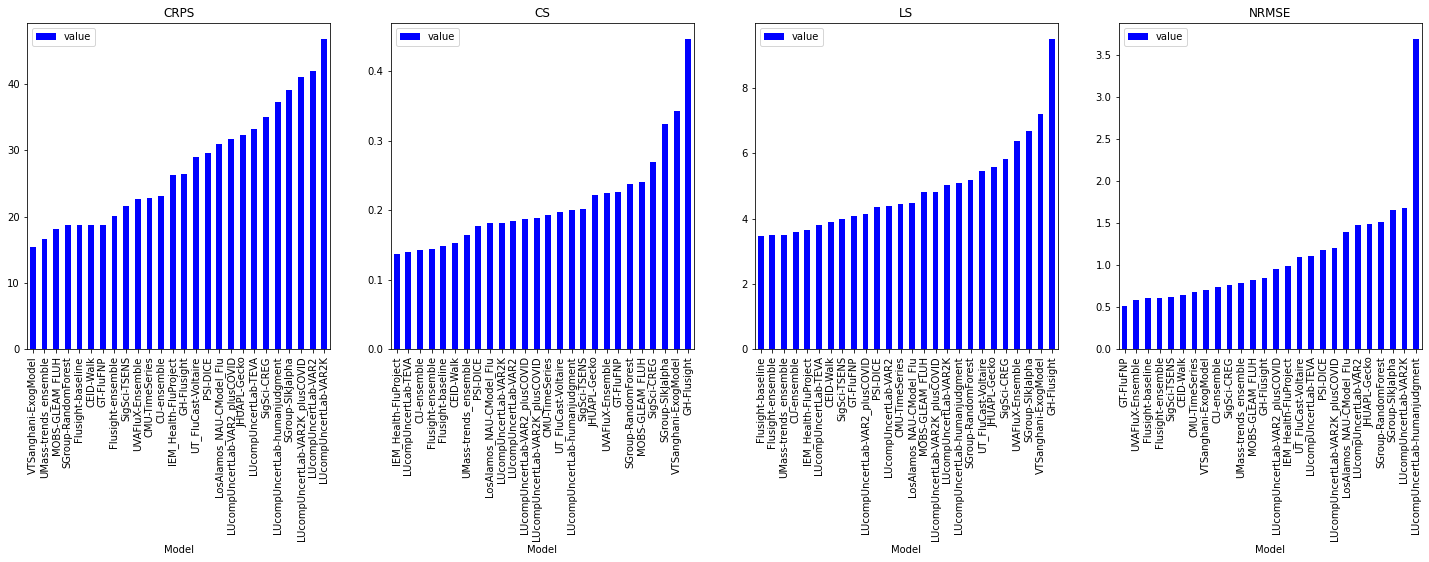

In [120]:
def plot_boxplots(dfi):
    # dfi = avg_per_model_per_week
    dfi = dfi.groupby(['Model']).mean().reset_index()
    # plot
    dfi = dfi.melt(id_vars=['Model'], value_vars=['NRMSE','CRPS','LS','CS'])
    dfi.set_index('variable',inplace=True)
    dfi = dfi.sort_values(by='value')
    grouped = dfi.groupby(level='variable')
    my_colors = ['blue' if i<2 else 'black' for i in range(26)]
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,6), sharey=False,squeeze=False)
    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        barlist = grouped.get_group(key).plot(ax=ax,kind='bar',x='Model',title=key,sort_columns=True,fontsize=10,color=my_colors)
    ax.legend()
    plt.show()

overall_avg_per_model = df.groupby(['Model']).mean()
plot_boxplots(overall_avg_per_model)


In [121]:
overall_avg_per_model = df.groupby(['Model']).mean()
overall_avg_per_model

,RMSE,NRMSE,MAPE,LS,CRPS,CS
Model,,,,,,
CEID-Walk,28.902763,0.646252,1.188981e+07,3.904667,18.759274,0.152204
CMU-TimeSeries,35.018368,0.679892,1.252839e+07,4.459303,22.866564,0.193450
CU-ensemble,35.952910,0.735904,2.175584e+07,3.596415,23.084650,0.143299
Flusight-baseline,30.638571,0.603365,1.487855e+07,3.476510,18.713093,0.148206
Flusight-ensemble,32.175988,0.604374,1.595203e+07,3.486043,20.046055,0.144703
GH-Flusight,30.595834,0.843777,9.060927e+06,9.509209,26.405402,0.446867
GT-FluFNP,28.814906,0.511307,1.285838e+07,4.072245,18.762863,0.225667
IEM_Health-FluProject,46.091632,0.992212,3.084254e+07,3.662498,26.318508,0.137435
JHUAPL-Gecko,51.032940,1.482481,2.662876e+07,5.582079,32.306496,0.222367


In [122]:
nrsme_df_avg = overall_avg_per_model[['NRMSE']]
nrsme_df_avg = nrsme_df_avg.sort_values(by='NRMSE')
nrsme_df_avg

,NRMSE
Model,
GT-FluFNP,0.511307
UVAFluX-Ensemble,0.580615
Flusight-baseline,0.603365
Flusight-ensemble,0.604374
SigSci-TSENS,0.621575
CEID-Walk,0.646252
CMU-TimeSeries,0.679892
VTSanghani-ExogModel,0.708575
CU-ensemble,0.735904


In [124]:
ls_df_avg = overall_avg_per_model[['LS']]
ls_df_avg = ls_df_avg.sort_values(by='LS')
ls_df_avg

,LS
Model,
Flusight-baseline,3.476510
Flusight-ensemble,3.486043
UMass-trends_ensemble,3.504766
CU-ensemble,3.596415
IEM_Health-FluProject,3.662498
LUcompUncertLab-TEVA,3.797863
CEID-Walk,3.904667
SigSci-TSENS,3.983845
GT-FluFNP,4.072245


In [125]:
cs_df_avg = overall_avg_per_model[['CS']]
cs_df_avg = cs_df_avg.sort_values(by='CS')
cs_df_avg

,CS
Model,
IEM_Health-FluProject,0.137435
LUcompUncertLab-TEVA,0.139313
CU-ensemble,0.143299
Flusight-ensemble,0.144703
Flusight-baseline,0.148206
CEID-Walk,0.152204
UMass-trends_ensemble,0.164131
PSI-DICE,0.176824
LosAlamos_NAU-CModel_Flu,0.180882


In [126]:
crps_df_avg = overall_avg_per_model[['CRPS']]
crps_df_avg = crps_df_avg.sort_values(by='CRPS')
crps_df_avg

,CRPS
Model,
VTSanghani-ExogModel,15.418584
UMass-trends_ensemble,16.577562
MOBS-GLEAM_FLUH,18.144294
SGroup-RandomForest,18.660668
Flusight-baseline,18.713093
CEID-Walk,18.759274
GT-FluFNP,18.762863
Flusight-ensemble,20.046055
SigSci-TSENS,21.662480


In [127]:
rsme_df_avg = overall_avg_per_model[['RMSE']]
rsme_df_avg = rsme_df_avg.sort_values(by='RMSE')
rsme_df_avg

,RMSE
Model,
VTSanghani-ExogModel,21.071071
UMass-trends_ensemble,26.359064
MOBS-GLEAM_FLUH,27.156862
SGroup-RandomForest,27.900365
GT-FluFNP,28.814906
CEID-Walk,28.902763
GH-Flusight,30.595834
Flusight-baseline,30.638571
UVAFluX-Ensemble,31.615757


In [128]:
mape_df_avg = overall_avg_per_model[['MAPE']]
mape_df_avg = mape_df_avg.sort_values(by='MAPE')
mape_df_avg

,MAPE
Model,
SGroup-RandomForest,6.306003e+06
UVAFluX-Ensemble,7.932059e+06
GH-Flusight,9.060927e+06
MOBS-GLEAM_FLUH,9.394882e+06
CEID-Walk,1.188981e+07
SigSci-CREG,1.206831e+07
CMU-TimeSeries,1.252839e+07
GT-FluFNP,1.285838e+07
Flusight-baseline,1.487855e+07


**GT-FluFNP-raw (green)** is the raw predictions. **GT-FluFNP (red)** is our submitted model, which smooths the raw predictions and uses std of data for uncertainty bounds, and some minor manual fixes. There are 27 models evaluated.

For all metrics, lower is better. CRPS, LS measures accuracy and uncertainty. CS mostly uncertainty. NRMSE only accuracy.
- CRPS: GT-FluFNP is doing well (ranked 7th out of 27 evaluated). 
- CS: Calibration score. We are among the worst. Raw predictions are even worse.
- LS: GT-FluFNP is doing well (ranked 7th)
- NRMSE: GT-FluFNP is best model. GT-FluFNP-raw is second best.

Conclusions:
- Accuracy: Our raw predictions are accurate. Smoothing is helping to improve accuracy.
- Uncertainty: Our raw uncertainty bounds are very bad (overconfidence). Our current process to add uncertainty bounds is helping but it is not good enough. 

In [129]:
avg_per_model_per_week = df.groupby(['Model','Weeks ahead']).mean()
avg_per_model_per_week = avg_per_model_per_week.reset_index()

#### Analyze 1-2 week ahead forecasting

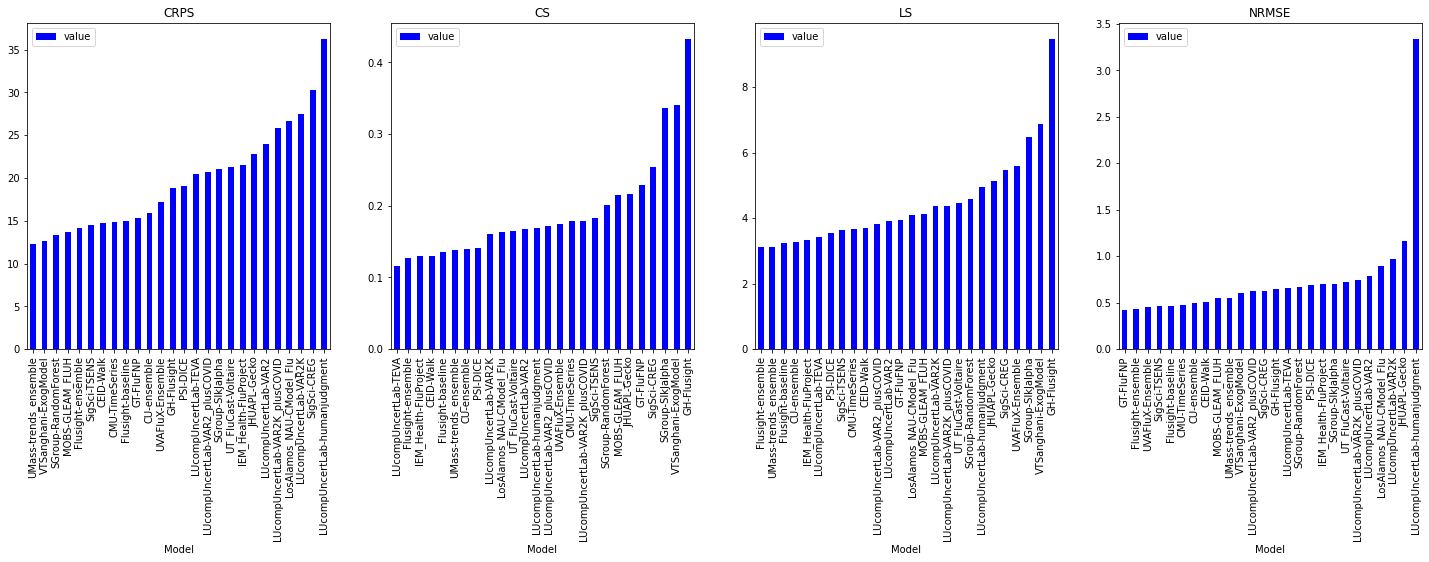

In [130]:
dfi = avg_per_model_per_week
dfi = dfi[dfi['Weeks ahead'].isin([1,2])].drop(['Weeks ahead'],axis=1)
plot_boxplots(dfi)

#### Analyze 3-4 week ahead forecasting

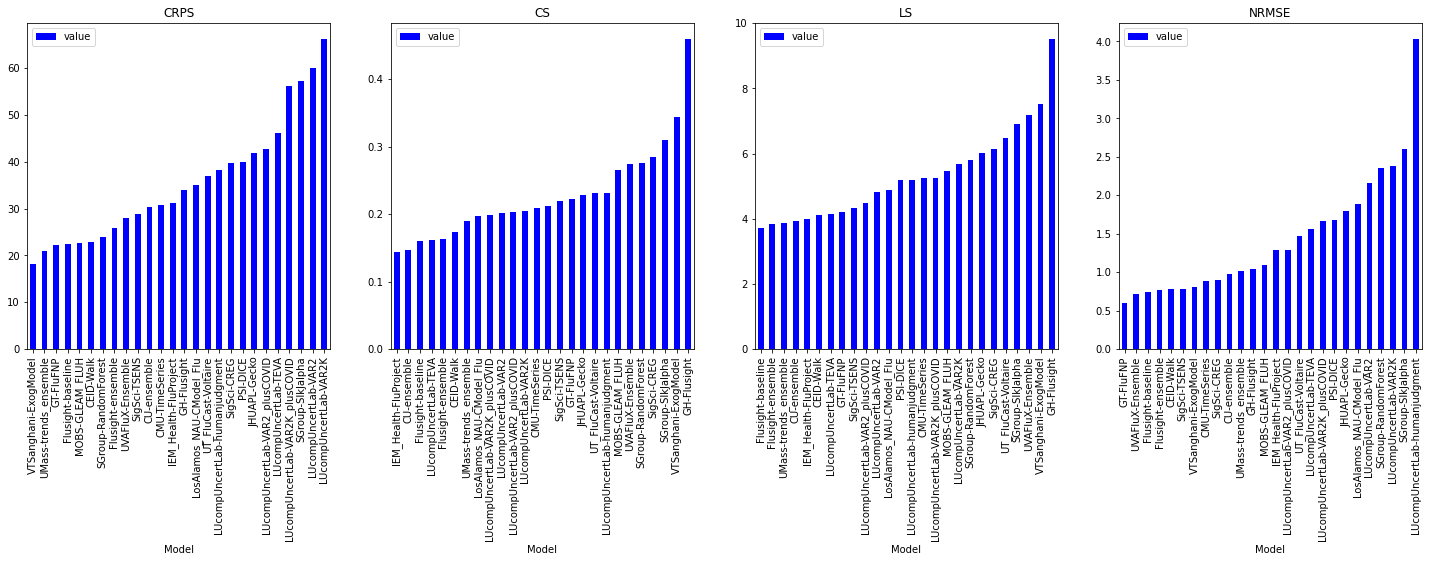

In [131]:
dfi = avg_per_model_per_week
dfi = dfi[dfi['Weeks ahead'].isin([3,4])].drop(['Weeks ahead'],axis=1)
plot_boxplots(dfi)

We don't see any different patterns. Conclusions remain the same.

### Comparison against Camul


In [19]:
%precision 4
processed = overall_avg_per_model.loc['GT-FluFNP']
raw = overall_avg_per_model.loc['GT-FluFNP-raw']
print('======== CRPS ========')
print('GT-FluFNP', processed['CRPS'])
print('GT-FluFNP-raw', raw['CRPS'])

======== CRPS ========
GT-FluFNP 25.0984137836804
GT-FluFNP-raw 31.902349371214246


Camul's CRPS for covid19 is 27.3. We are in the same ballpark.

In [20]:
print('======== CS ========')
print('GT-FluFNP', processed['CS'])
print('GT-FluFNP-raw', raw['CS'])

======== CS ========
GT-FluFNP 0.23785533960061345
GT-FluFNP-raw 0.4346474984982434


Camul's CS for covid19 is 0.14. The raw predictions have bad CS. We have to investigate this further.

In [22]:
print('======== NRMSE ========')
print('GT-FluFNP', processed['RMSE'])
print('GT-FluFNP-raw', raw['RMSE'])

======== NRMSE ========
GT-FluFNP 37.96700679360358
GT-FluFNP-raw 40.714919069840725


Camul's NRMSE for covid19 is 27.3. We are higher than this.

Conclusion:
- Camul did much better in uncertainty quantification for covid19. We need further investigation.